#### Project Title

- Leslie Cohrt: put their contribution here
- Sarah Auther: put their contribution here
- Shoshana Medved: put their contribution here

#### Introduction

In this study, we aim to understand how people spoke about ChatGPT on Twitter during the first month of its launch. Through this project, we hope to pinpoint any key differences in responses as ChatGPT became more mainstream. By analyzing a data sample of over 200,000 Tweets from November 30th to December 31st, 2022, we will be able to search for key communication trends among users and recurring beliefs about ChatGPT as an emerging platform. 

We are interested in discovering how people view ChatGPT based on data from Twitter
- Through the lens of computer-mediated communication, how has public opinion of ChatGPT evolved as its usage has become more normalized?  
- What generates the most reaction between real people when talking about ChatGPT?

Detailed description of dataset

In [1]:
import pandas as pd

df = pd.read_csv("chatgpt.data.csv")
df.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code
0,1.598010e+18,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...,NaN,NaN,NaN,NaN
1,1.598010e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh...",NaN,NaN,NaN,NaN
2,1.598010e+18,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...,NaN,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,NaN,NaN
3,1.598020e+18,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ...",NaN,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,NaN,NaN
4,1.598020e+18,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne...",NaN,NaN,NaN,NaN


In [2]:
# preprocessing

import numpy as np

df1 = df.fillna(value=0)
df1 = df1.loc[df1["like_count"] != 0]

df1.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count
count,1.201360e+05,120136.000000,120136.000000,120136.000000,120136.000000
mean,1.602453e+18,30.716463,0.716072,2.120688,4.155083
std,2.985152e+15,658.769995,19.037848,34.355344,85.684421
min,1.598010e+18,1.000000,0.000000,0.000000,0.000000
25%,1.600020e+18,1.000000,0.000000,0.000000,0.000000
50%,1.601650e+18,2.000000,0.000000,0.000000,0.000000
75%,1.604640e+18,6.000000,0.000000,1.000000,1.000000
max,1.609340e+18,119321.000000,4598.000000,5184.000000,10593.000000


Our research questions are about shared public opinion and about opinions that generate conversation and response. Tweets with no likes are not indicative of opinions shared by many and do not generate response, so we removed them from the dataset.

In [3]:
!pip install nltk

import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

!pip install textblob
from textblob import TextBlob

import re

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Word tokenization    
text = df1['tweet'].apply(word_tokenize)


In [5]:
print(text)

0         [ChatGPT, :, Optimizing, Language, Models, for...
1         [Try, talking, with, ChatGPT, ,, our, new, AI,...
2         [ChatGPT, :, Optimizing, Language, Models, for...
3         [THRILLED, to, share, that, ChatGPT, ,, our, n...
4         [As, of, 2, minutes, ago, ,, @, OpenAI, releas...
                                ...                        
219287    [One, of, my, new, favorite, thing, to, do, wi...
219288    [Sounds, like, AI, ca, n't, predict, 2023, tre...
219290    [I, asked, #, ChatGPT, to, write, a, #, NYE, J...
219291    [chatgpt, is, being, disassembled, until, it, ...
219292    [2023, predictions, by, #, chatGPT, ., Nothing...
Name: tweet, Length: 120136, dtype: object


In [6]:
import string

In [7]:
stop_words = set(stopwords.words('english'))

for column in df1.columns:
    if df1[column].dtype == 'object': # check if the column contains text data
        df1[column] = df1[column].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words]))

In [8]:
df1.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code
0,1.598010e+18,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models Dialogue h...,0,0,0,0
1,1.598010e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking ChatGPT, new AI system optimized d...",0,0,0,0
2,1.598010e+18,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models Dialogue h...,0,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,0,0
3,1.598020e+18,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED share ChatGPT, new model optimized di...",0,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,0,0
4,1.598020e+18,2022-11-30 18:06:01+00:00,1,0,0,0,"2 minutes ago, @OpenAI released new ChatGPT. \...",0,0,0,0


In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [10]:
def get_sentiment(tweet):
    sentiment = sid.polarity_scores(tweet)
    return sentiment['compound']
    
df1['sentiment'] = df1['tweet'].apply(get_sentiment)

In [11]:
df1['sentiment']

0         0.4588
1         0.8225
2         0.4588
3         0.9029
4         0.0000
           ...  
219287    0.8481
219288    0.3612
219290    0.6360
219291    0.0000
219292    0.0000
Name: sentiment, Length: 120136, dtype: float64

In [12]:
df1.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count,sentiment
count,1.201360e+05,120136.000000,120136.000000,120136.000000,120136.000000,120136.000000
mean,1.602453e+18,30.716463,0.716072,2.120688,4.155083,0.206922
std,2.985152e+15,658.769995,19.037848,34.355344,85.684421,0.406783
min,1.598010e+18,1.000000,0.000000,0.000000,0.000000,-0.967400
25%,1.600020e+18,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.601650e+18,2.000000,0.000000,0.000000,0.000000,0.128000
75%,1.604640e+18,6.000000,0.000000,1.000000,1.000000,0.542300
max,1.609340e+18,119321.000000,4598.000000,5184.000000,10593.000000,0.990200


In [13]:
postive_tweets = df1[df1['sentiment'] > 0]
negative_tweets = df1[df1['sentiment'] < 0]
neutral_tweets = df1[df1['sentiment'] == 0]

postive_percentage = len(postive_tweets) / len(df1) * 100
negative_percentage = len(negative_tweets) / len(df1) * 100
neutral_percentage = len(neutral_tweets) / len(df1) * 100

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#### How have people's opinions of ChatGPT evolved as its usage has become more normalized?
- sentiment analysis
- dependency parsing

In [15]:
df1.sort_values(by=['created_at'], ascending=True, inplace=True)

df1.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code,sentiment
0,1.598010e+18,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models Dialogue h...,0,0,0,0,0.4588
1,1.598010e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking ChatGPT, new AI system optimized d...",0,0,0,0,0.8225
2,1.598010e+18,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models Dialogue h...,0,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,0,0,0.4588
3,1.598020e+18,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED share ChatGPT, new model optimized di...",0,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,0,0,0.9029
4,1.598020e+18,2022-11-30 18:06:01+00:00,1,0,0,0,"2 minutes ago, @OpenAI released new ChatGPT. \...",0,0,0,0,0.0000


data = df1

sns.scatterplot(x="created_at", y="sentiment", hue="sentiment", data=data)
plt.title("Sentiment Analysis Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.legend(title="Sentiment")
plt.show()

### what we gotta do
- sort by date created, then find sentiment averages over time

#### What generates the most reaction between real people when talking about ChatGPT?
- sentiment analysis

In [16]:
#reducing the data set to the 250 tweets with the most interaction based on a combination of likes, retweets, quotes, and replies.

df_r2 = df1.loc[(df1["like_count"] >299) & (df1["reply_count"] >49) & (df1["retweet_count"] >49) & (df1["quote_count"] >24)]

df_r2.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count,sentiment
count,2.500000e+02,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.601852e+18,7658.344000,194.260000,315.696000,1052.952000,0.206099
std,3.320418e+15,12128.445301,368.221374,659.398603,1525.524037,0.409143
min,1.598010e+18,360.000000,26.000000,50.000000,54.000000,-0.831600
25%,1.599230e+18,2130.750000,43.000000,79.000000,260.000000,0.000000
50%,1.600480e+18,4072.000000,88.000000,136.500000,520.000000,0.089950
75%,1.604585e+18,7524.750000,186.750000,243.750000,1116.000000,0.557400
max,1.609240e+18,119321.000000,4598.000000,5184.000000,10593.000000,0.945100


In [17]:
postive_top_tweets = df_r2[df_r2['sentiment'] > 0]
negative_top_tweets = df_r2[df_r2['sentiment'] < 0]
neutral_top_tweets = df_r2[df_r2['sentiment'] == 0]

postive_percentage_top = len(postive_top_tweets) / len(df_r2) * 100
negative_percentage_top = len(negative_top_tweets) / len(df_r2) * 100
neutral_percentage_top = len(neutral_top_tweets) / len(df_r2) * 100

In [18]:
df_r2

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code,sentiment
1,1.598010e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking ChatGPT, new AI system optimized d...",0,0,0,0,0.8225
5,1.598020e+18,2022-11-30 18:06:29+00:00,2376,72,85,372,"launched ChatGPT, new AI system optimized dial...",0,0,0,0,0.5423
36,1.598020e+18,2022-11-30 18:26:58+00:00,23201,827,477,4024,OK @OpenAI's new #ChatGPT basically generate #...,0,https://pbs.twimg.com/media/Fi1PSqaXEBAivit.png,0,0,0.5904
39,1.598020e+18,2022-11-30 18:29:47+00:00,26835,1142,898,4108,Google done.\n\nCompare quality responses (Cha...,0,https://pbs.twimg.com/media/Fi1QA60XwAAhrq0.jpg,0,0,0.0000
60,1.598030e+18,2022-11-30 19:06:41+00:00,3527,80,68,556,"OpenAI released ChatGPT. Damn, good. might GPT...",0,https://pbs.twimg.com/media/Fi1UrAyVQAARpe9.jpg,0,0,0.0516
...,...,...,...,...,...,...,...,...,...,...,...,...
212398,1.608690e+18,2022-12-30 05:02:57+00:00,3192,168,145,621,#ChatGPT video via #stablediffusion AI tools. ...,0,0,0,0,0.0000
212957,1.608750e+18,2022-12-30 09:14:29+00:00,4347,98,93,1098,📢 New #ChatGPT extension!\n\n`ChatGPT Writer` ...,0,0,0,0,0.0000
217074,1.609110e+18,2022-12-31 08:45:13+00:00,3165,72,485,113,"write ""thank you"" ChatGPT helps you? got idea ...",0,0,0,0,0.6249
217654,1.609170e+18,2022-12-31 12:35:14+00:00,2258,76,682,249,"code bug, go first?\n\n1. Google\n2. StackOver...",0,0,0,0,-0.4767


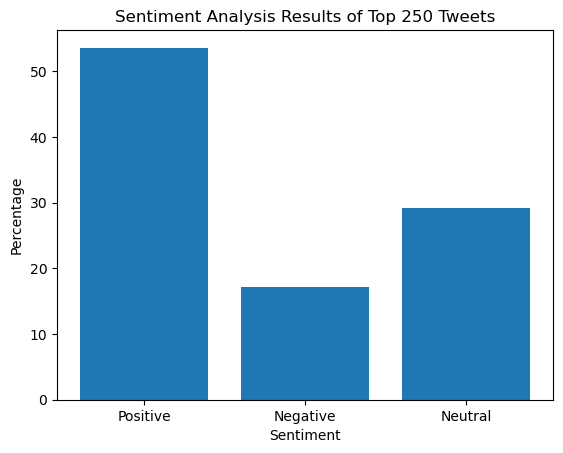

In [19]:
sentiment_labels_2 = ['Positive', 'Negative', 'Neutral']
sentiment_percentages_2 = [postive_percentage_top, negative_percentage_top, neutral_percentage_top]

plt.bar(sentiment_labels_2, sentiment_percentages_2)
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis Results of Top 250 Tweets')

plt.show()

### what we gotta do part 2
- word cloud for the whole dataset and the df_r2 -> compare differences- are there any buzzwords that get more attention

### results and whatnot
- doesn't vary from the full set